In [7]:
import numpy as np
import pandas as pd
import time

def load_dataset(file):
    try:
        df = pd.read_csv('normal_streams\{}.txt'.format(file), sep=",", header=None)
        df.columns = ["T","D","SC","SP","DC","DP","PRO","PC","BC"]
        return df
    except FileNotFoundError:
        pass
    except pd.io.common.EmptyDataError:
        pass

df = load_dataset(408)

In [9]:
dict_of_features = {}
for i in range(7516):
    df1 = load_dataset(i)
    if (df1 is None):
        continue
    
    num_of_packets = df1.PC.sum()
    avg_bytes_per_packet = df1.BC.sum()/num_of_packets
    avg_duration = df1.D.mean()
    num_of_flows = df1.shape[0]
    avg_packets_per_flow = num_of_packets/num_of_flows
    num_of_single_packet_flow = (df1['PC'] == 1).sum()

    temp = np.array([num_of_packets, avg_bytes_per_packet, avg_duration, num_of_flows, avg_packets_per_flow, num_of_single_packet_flow])
    temp.astype(float)
    dict_of_features[i] = temp

In [13]:
df_all = pd.DataFrame.from_dict(dict_of_features, orient='index')
df_all.columns = ["num_of_packets", "avg_bytes_per_packet", "avg_duration", "num_of_flows", "avg_packets_per_flow", "num_of_single_packet_flow"]

In [14]:
def X_squared(curr, mean_level):
    result = np.sum(np.square((curr - mean_level)) / mean_level)
    return result

In [15]:
from sklearn.preprocessing import MinMaxScaler
df_all_scaled = df_all.apply(lambda x: MinMaxScaler().fit_transform(x))
mean_level = df_all_scaled.values.mean(axis=0)
mean_level
df_all_scaled.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

,num_of_packets,avg_bytes_per_packet,avg_duration,num_of_flows,avg_packets_per_flow,num_of_single_packet_flow
1,0.032726,0.643720,0.579025,0.049861,0.043034,0.020121
2,0.027498,0.660530,0.610016,0.044196,0.040762,0.015610
3,0.030523,0.671603,0.627446,0.046969,0.042595,0.016722
4,0.032424,0.665517,0.676841,0.044072,0.048241,0.016081
5,0.032541,0.650922,0.649872,0.041827,0.051015,0.015269


In [16]:
df_all_scaled['X_squared_score'] = 0

for i in range(len(df_all_scaled)):
    result = X_squared(df_all_scaled.iloc[i,:6].values,mean_level)
    df_all_scaled.iloc[i,6] = result

df_all_scaled.head()

,num_of_packets,avg_bytes_per_packet,avg_duration,num_of_flows,avg_packets_per_flow,num_of_single_packet_flow,X_squared_score
1,0.032726,0.643720,0.579025,0.049861,0.043034,0.020121,0.128192
2,0.027498,0.660530,0.610016,0.044196,0.040762,0.015610,0.147154
3,0.030523,0.671603,0.627446,0.046969,0.042595,0.016722,0.137312
4,0.032424,0.665517,0.676841,0.044072,0.048241,0.016081,0.129735
5,0.032541,0.650922,0.649872,0.041827,0.051015,0.015269,0.127943


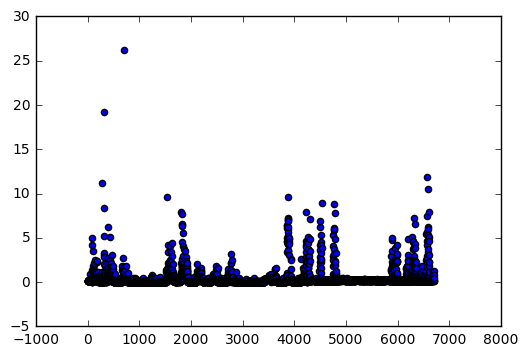

In [42]:
import matplotlib.pyplot as plt
plt.scatter(df_all_scaled.index.values, df_all_scaled.X_squared_score)
plt.show()

In [31]:
mu = np.mean(df_all_scaled.X_squared_score)
sigma = np.std(df_all_scaled.X_squared_score)

print("mean of XSquared:", mu)
print("standard deviation of XSquared:", sigma)
print("Threshold (mean + 2 * std) = ",mu + 3 * sigma)

suspicious_labels = []
count = 0
for i in range(len(df_all_scaled)):
    if (df_all_scaled.iloc[i,6] > mu + 3 * sigma):
        suspicious_labels.append(df_all.index.values[i])
        count += 1
print('total suspicious:',count)
print(suspicious_labels)

for i in suspicious_labels:
    print(" No. {0} stream has chi-squared score of: {1}".format(i, df_all_scaled.loc[i,'X_squared_score']))

mean of XSquared: 0.3515900037207699
standard deviation of XSquared: 0.8963839519837954
Threshold (mean + 2 * std) =  3.040741859672156
total suspicious: 128
[87, 89, 99, 285, 312, 313, 314, 316, 317, 387, 426, 705, 1539, 1559, 1563, 1584, 1617, 1623, 1809, 1821, 1822, 1825, 1826, 1827, 1845, 1851, 1866, 1877, 2773, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 4218, 4219, 4220, 4221, 4223, 4248, 4256, 4260, 4264, 4268, 4294, 4298, 4306, 4494, 4496, 4503, 4504, 4508, 4515, 4519, 4520, 4525, 4526, 4746, 4752, 4757, 4758, 4762, 4763, 4767, 4768, 4782, 4793, 4797, 5881, 5885, 5890, 5945, 5977, 5990, 6204, 6280, 6287, 6290, 6292, 6306, 6320, 6325, 6329, 6331, 6542, 6562, 6566, 6570, 6574, 6575, 6578, 6579, 6582, 6586, 6590, 6593, 6594, 6598, 6601, 6605, 6610]
 No. 87 stream has chi-squared score of: 4.171653710751208
 No. 89 stream has chi-square

In [32]:
def get_detail_by_timewindow(index):
    list1 = []
    suspicious_file = load_dataset(index)
    
    f1 = suspicious_file.groupby(['SC']).sum()['PC']
    f2 = suspicious_file.groupby(['SC']).sum()['BC']/ f1
    f3 = suspicious_file.groupby(['SC']).mean()['D']
    f4 = suspicious_file.groupby(['SC']).count()['T']
    f5 = f1/f4
    f6 = suspicious_file.groupby(['SC']).agg({"PC" : {'F6':lambda x: (x == 1).sum()}})['PC']['F6']
    
    list1 = [f1, f2, f3, f4, f5, f6]
    
    return list1

In [33]:
def get_top_SC_from_index(index):
    lst = get_detail_by_timewindow(index)
    output = []
    for f in lst:
        d = f.to_dict()
        top_10 = sorted(d, key=d.get, reverse=True)[:5]
        output.extend(top_10)
    return output

In [34]:
from collections import Counter

top_SC = []

for index in suspicious_labels:
    top_SC.extend(get_top_SC_from_index(index))

top_SC_counts = Counter(top_SC)
print(top_SC_counts)

Counter({'C1707': 210, 'C1685': 204, 'C20101': 193, 'C5698': 167, 'C528': 126, 'C467': 125, 'C586': 124, 'C5720': 123, 'C5721': 106, 'C21745': 96, 'C2321': 95, 'C1295': 82, 'C612': 79, 'C2893': 65, 'C5736': 63, 'C2519': 61, 'C5787': 50, 'C529': 50, 'C5808': 49, 'C5802': 46, 'C7244': 46, 'C12277': 43, 'C706': 40, 'C1065': 35, 'C754': 35, 'C2320': 34, 'C9729': 32, 'C2174': 28, 'C231': 27, 'C1107': 24, 'C5696': 24, 'C5782': 23, 'C6181': 22, 'C5900': 20, 'C2949': 19, 'C2651': 19, 'C6123': 17, 'C6785': 17, 'C6144': 16, 'C6509': 16, 'C6055': 16, 'C9336': 16, 'C1319': 12, 'C21874': 12, 'C3637': 12, 'C9956': 11, 'C9610': 11, 'C22667': 11, 'C571': 11, 'C18779': 11, 'C1840': 11, 'C8831': 10, 'C16712': 10, 'C1082': 10, 'C5517': 10, 'C13544': 10, 'C5030': 9, 'C15124': 9, 'C9880': 9, 'C2368': 9, 'C5948': 8, 'C24270': 8, 'C3156': 8, 'C13358': 8, 'C5763': 8, 'C5362': 8, 'C1155': 8, 'C4323': 8, 'C195': 8, 'C1347': 8, 'C14879': 8, 'C2600': 8, 'C2091': 8, 'C15665': 7, 'C12375': 7, 'C2693': 7, 'C6306': 7

In [41]:
top_SC_counts.most_common(20)

[('C1707', 210),
 ('C1685', 204),
 ('C20101', 193),
 ('C5698', 167),
 ('C528', 126),
 ('C467', 125),
 ('C586', 124),
 ('C5720', 123),
 ('C5721', 106),
 ('C21745', 96),
 ('C2321', 95),
 ('C1295', 82),
 ('C612', 79),
 ('C2893', 65),
 ('C5736', 63),
 ('C2519', 61),
 ('C5787', 50),
 ('C529', 50),
 ('C5808', 49),
 ('C5802', 46)]